Enter the value of q [2]: 2
Enter the value of y0 [0]: 0
The trial solution is:  ci_1*x*(1 - x) + ci_2*x**2*(1 - x)
The functional is:
-3*ci_1**2/10 - 3*ci_1*ci_2/10 + ci_1/6 - 13*ci_2**2/105 + ci_2/10
The Approximate Solution is: yt=  ci_1*x*(1 - x) + ci_2*x**2*(1 - x)


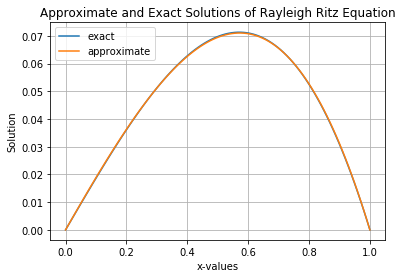

In [3]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

x=Symbol('x')
q=int(input("Enter the value of q [2]: "))
y0=int(input("Enter the value of y0 [0]: "))
basis = [x**i*(1-x) for i in range(q+1)]
ci=[Symbol("ci_%i" %i) for i in np.arange(q+1)]
y = y0 + sum(ci[i]*basis[i] for i in range(1,q+1))
print("The trial solution is: ",y)
k=Matrix([[0,0],[0,0]])
f=Matrix(1,q,range(q))
for i in range(1,q+1):
        for j in range(1,q+1):
            k[i-1,j-1]=ci[i]*ci[j]*basis[i]*basis[j]+ci[i]*ci[j]*basis[i]\
            *diff(basis[j],x,x)
#print(sum(k.reshape(1,9)))
for i in range(1,q+1):
     f[i-1]=2*x*ci[i]*basis[i]
functional=integrate(sum(k.reshape(1,q**2))+sum(f),[x,0,1])
print("The functional is:")
print(functional)        
#Evaluation of Partial Derivatives
s1=Derivative(functional,ci[1])
d1=s1.doit()
s2=Derivative(functional,ci[2])
d2=s2.doit()
xx=solve([d1,d2],dict=True)
yt=y.subs(xx,x)
print("The Approximate Solution is: yt= ",yt)
x=np.linspace(0,1,100)
result=7*x**2*(-x + 1)/41 + 71*x*(-x + 1)/369
result1=x*(1-x)*(0.1924+0.1708*x)
exact=np.sin(x)/np.sin(1)-x
plt.plot(x,exact)
plt.plot(x,result)
#plt.plot(x,result1)
plt.xlabel('x-values')
plt.ylabel('Solution')
plt.legend(('exact','approximate'),loc='best')
plt.title('Approximate and Exact Solutions of Rayleigh Ritz Equation')
plt.grid(True)
plt.show()